<a href="https://colab.research.google.com/github/Kishore192/Machine-Learning/blob/main/Project_3Housing_Assignment_kishore_Batch73.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [ ]:
data=pd.read_csv("/content/Housing.csv")

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data['mainroad']=data['mainroad'].apply({'yes':1,'no':0}.get)
data['guestroom']=data['guestroom'].apply({'yes':1,'no':0}.get)
data['basement']=data['basement'].apply({'yes':1,'no':0}.get)
data['hotwaterheating']=data['hotwaterheating'].apply({'yes':1,'no':0}.get)
data['airconditioning']=data['airconditioning'].apply({'yes':1,'no':0}.get)
data['prefarea']=data['prefarea'].apply({'yes':1,'no':0}.get)
data['furnishingstatus']=data['furnishingstatus'].apply({'furnished':1,'unfurnished':0,'semi-furnished':2}.get)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


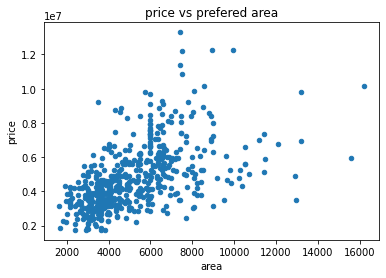

In [ ]:
data.plot.scatter(x='area',y='price')
plt.title('price vs prefered area')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [ ]:
x=data[['area','bedrooms','bathrooms','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]

In [ ]:
y=data['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()

In [ ]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=linear_model.predict(x_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [ ]:
df1=df.head(25)

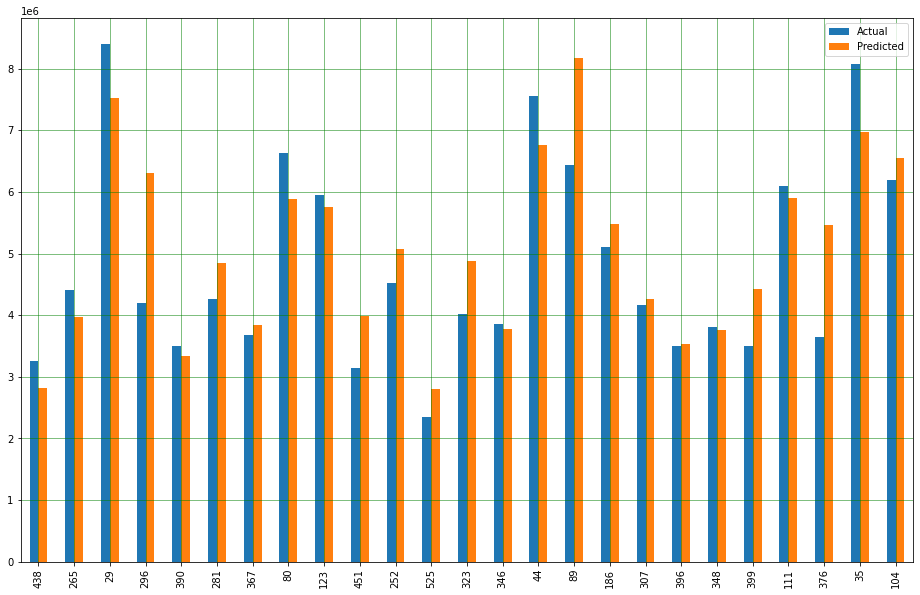

In [ ]:
#visualise comparison result as a bar graph
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle='-',linewidth='0.5',color='black')
plt.show()

In [ ]:
print(y_pred,"is the price of houses calculated by ML model")

[2823863.05208852 3967732.738574   7521350.13681027 6308349.48569579
 3334645.40038382 4845796.71252315 3832380.95570731 5876465.16588588
 5758179.16842925 3989639.4100021  5073517.75239544 2804682.8634066
 4874379.60016847 3776045.36633957 6762245.00169214 8165213.37728387
 5484102.43349233 4261644.28081275 3530470.40529571 3762052.88269216
 4428160.0310904  5897829.35923769 5457849.96708223 6966183.93444083
 6547007.07206983 4382391.1541277  5739603.95572959 2901468.80688851
 7047316.45723567 3781544.02197535 2814060.2331363  2662982.08464685
 2647104.48063002 4246116.55068851 4462576.53822225 5857712.27101194
 2403391.23439606 3162666.62968564 5331189.93720324 3186863.11555611
 5585093.85297747 4024703.92480151 4084039.02963038 3724706.59358368
 4026064.17410453 3844883.30662906 2982335.254368   3603257.95461871
 4122590.24814506 2850901.99839586 5190349.33601042 5190513.82759692
 4777469.43208254 2819570.79136826 3745702.66395325 2916572.01694057
 4276827.82385225 7781481.28367188 

In [ ]:
accuracy=linear_model.score(x,y)

In [ ]:
print(accuracy)

0.6466270507018241
